### Data Description
Pulse Transit Time PPG Dataset  
(https://www.physionet.org/content/pulse-transit-time-ppg/1.1.0/#files)  

다중 센서를 통한 PPG, ECG 등 데이터를 포함.  
22명의 피실험자 대상으로 3가지 활동을 수행하도록 함. (sit, walk, run)


In [443]:
import pandas as pd

ppg = pd.read_csv('./dataset/s9_sit.csv')
ppg

,time,ecg,peaks,pleth_1,pleth_2,pleth_3,pleth_4,pleth_5,pleth_6,lc_1,lc_2,temp_1,temp_2,temp_3,a_x,a_y,a_z,g_x,g_y,g_z
0,2021-01-01 11:53:53.793086,30259,0,67562,81029,4548,72704,100328,4386,6490394,6484197,28.38,31.25,30.270075,5.387827,2.786394,-7.666026,-0.031880,-0.003963,-0.008745
1,2021-01-01 11:53:53.795086,29614,0,67562,81029,4548,72704,100328,4386,6488845,6484192,28.38,31.25,30.264084,5.392017,2.787591,-7.667822,-0.030016,-0.004495,-0.008478
2,2021-01-01 11:53:53.797086,29126,0,67572,81036,4544,72701,100333,4390,6488845,6484192,28.38,31.25,30.264084,5.377651,2.780408,-7.661237,-0.027486,-0.004629,-0.008079
3,2021-01-01 11:53:53.799086,28984,0,67580,81030,4546,72714,100339,4386,6488845,6484192,28.38,31.25,30.261089,5.365679,2.782204,-7.654054,-0.025754,-0.004629,-0.007813
4,2021-01-01 11:53:53.801086,29217,0,67576,81015,4547,72715,100331,4392,6488845,6484192,28.38,31.25,30.261089,5.360292,2.779211,-7.652857,-0.023224,-0.004762,-0.006880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243412,2021-01-01 12:02:00.617088,29653,0,67477,80152,4101,73240,99936,4274,6558846,6530600,28.50,31.38,30.434811,5.302828,2.111195,-7.917430,0.012196,0.003095,0.016955
243413,2021-01-01 12:02:00.619088,29493,0,67474,80158,4112,73234,99927,4279,6558846,6530600,28.50,31.38,30.443794,5.308814,2.109998,-7.909050,0.012329,0.002695,0.017088
243414,2021-01-01 12:02:00.621088,29494,0,67478,80155,4108,73230,99944,4277,6560521,6531056,28.50,31.38,30.449787,5.304026,2.106406,-7.897677,0.012995,0.003095,0.017222
243415,2021-01-01 12:02:00.623088,29588,0,67472,80159,4107,73237,99948,4283,6560521,6531056,28.50,31.38,30.452782,5.305821,2.102815,-7.894085,0.013927,0.003627,0.017222


데이터 일부를 취해 heartpy 분석이 가능한지 테스트

In [444]:
import heartpy as hp
import matplotlib.pyplot as plt

sample_rate = 500

data = (ppg.iloc[0:12000, [1]]).to_numpy().flatten()
data

array([30259, 29614, 29126, ..., 33360, 33208, 33080])

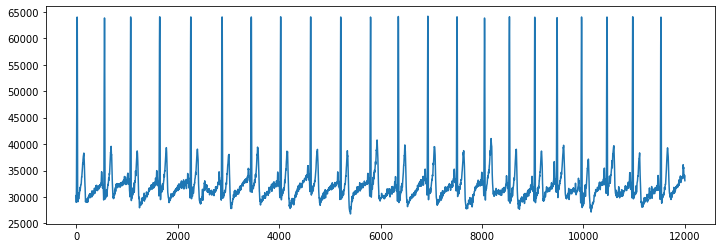

In [445]:
plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

In [446]:
import matplotlib.pyplot as plt
import numpy as np

In [447]:
wd, m = hp.process(data, sample_rate)

# plt.figure(figsize=(12, 4))
# hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

bpm: 54.699608
ibi: 1096.900000
sdnn: 95.086224
sdsd: 40.384029
rmssd: 68.106727
pnn20: 0.631579
pnn50: 0.526316
hr_mad: 57.000000
sd1: 48.071161
sd2: 128.420578
s: 19394.076694
sd1/sd2: 0.374326
breathingrate: 0.182332


# 데이터 전처리  
파형 특성을 담은 dataframe 만들기

In [448]:
feature_df = pd.DataFrame(columns=['subject', 'bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate'])
feature_df

,subject,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate


각 피실험자의 데이터를 분할해 heartpy로 분석하고 dataframe에 파형의 특성들을 담기  
해당 과정을 반복

In [449]:
# def analyze_hp(start):
start_subject_idx = 16
for subject_num in range(start_subject_idx, start_subject_idx+4):
    ppg = pd.read_csv('./dataset/s' + str(subject_num+1) + '_sit.csv')
    for i in range(20): # 24초 * 20 == 480초
        start_idx = i * 12000
        data = (ppg.iloc[start_idx:start_idx+12000, [1]]).to_numpy().flatten()
        new_features_list = []

        wd, m = hp.process(data, sample_rate)

        new_features_list.append(subject_num)
        for measure in m.keys():
            # print('%s: %f' %(measure, m[measure]))
            new_features_list.append(m[measure])
        
        feature_df.loc[len(feature_df)] = new_features_list

feature_df.to_csv('./dataset/processed/feature_data.csv', encoding='utf-8', mode='w', index=False)
feature_df

,subject,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
0,16.0,82.637285,726.064516,50.737742,26.994320,45.639164,0.633333,0.266667,38.0,32.231937,63.689594,6449.183958,0.506079,0.133286
1,16.0,78.390384,765.400000,57.183098,28.282590,51.900435,0.724138,0.413793,39.0,36.693674,73.380801,8459.087460,0.500045,0.304851
2,16.0,76.909477,780.137931,56.348499,34.308326,55.569776,0.714286,0.357143,30.0,39.285455,70.510384,8702.313736,0.557158,0.265205
3,16.0,77.292111,776.275862,55.878499,27.346231,54.871278,0.857143,0.321429,36.0,38.791436,69.892629,8517.597367,0.555015,0.266525
4,16.0,78.514141,764.193548,46.016420,27.992380,54.189790,0.800000,0.400000,38.0,38.291862,51.463385,6190.913020,0.744060,0.126636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,19.0,81.952767,732.129032,53.373753,21.786438,33.819127,0.533333,0.133333,24.0,23.756917,71.162475,5311.179710,0.333841,0.264364
76,19.0,87.001024,689.647059,28.509939,16.493313,26.158028,0.393939,0.060606,25.0,18.478588,35.881859,2083.020735,0.514984,0.170590
77,19.0,83.912528,715.030303,50.498416,17.821599,29.593074,0.468750,0.093750,46.0,20.883419,68.739033,4509.775197,0.303807,0.127140
78,19.0,78.802206,761.400000,48.785654,20.946679,30.981641,0.379310,0.137931,34.0,21.776620,65.404731,4474.551418,0.332952,0.131337


In [450]:
# pd.set_option('display.max_rows', 500)
# test = feature_df[train_columns]
# test['sdsd'].str.contains('--')
# pd.set_option('display.max_rows', 10)

In [451]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

feature_df = pd.read_csv('./dataset/processed/feature_data.csv')

# features
train_columns = ['bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate']

# 비정상 값 처리
feature_df[train_columns] = feature_df[train_columns].replace('--', 0.0)

# 결측치 처리
feature_df[train_columns] = feature_df[train_columns].interpolate(method='linear', limit_direction='forward')
# feature_df[train_columns] = feature_df[train_columns].fillna(method='bfill')

# Scale X value
# scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler = RobustScaler()
scaler.fit(feature_df[train_columns])
feature_scaled_X = scaler.transform(feature_df[train_columns])
feature_scaled_X_df = pd.DataFrame(feature_scaled_X, columns=train_columns)

# (y value type) float to int
feature_df['subject'] = feature_df['subject'].astype(int)

# train / test 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(feature_scaled_X_df, feature_df['subject'],
                                                    test_size = 0.1, random_state = 32)

# normalize y value
le = LabelEncoder()
y_train = le.fit_transform(y_train, )

X_train

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
46,1.842234,-1.668811,1.202089,0.131793,0.018971,-0.182572,0.000000,-0.519481,0.010100,1.078308,0.487806,-0.295316,-0.301330
12,0.944205,-0.898485,0.042620,0.734831,0.766111,0.932820,0.662953,0.207792,0.770269,-0.127892,0.302899,0.901746,0.381440
69,1.275730,-1.191752,1.197299,0.002856,-0.294480,-0.790595,-0.132087,-0.519481,-0.311775,1.093098,0.124646,-0.467188,-0.631665
58,1.870409,-1.691784,0.906372,-0.002856,-0.010029,0.080553,-0.159534,0.883117,-0.010100,0.892850,0.356319,-0.253358,-0.329028
55,0.379907,-0.373355,-0.539804,-0.243671,-0.127351,-0.309642,-0.116992,0.103896,-0.123907,-0.356356,-0.442193,0.302329,0.004227
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,-0.323276,0.331199,1.131364,2.122850,1.572067,0.634306,1.253482,1.246753,1.570374,0.805514,1.960112,0.683644,0.701801
62,0.240044,-0.237838,-0.353028,-0.578591,-0.310142,-0.083740,-0.272981,-0.207792,-0.298605,-0.153433,-0.452195,-0.009754,-0.327806
54,0.240719,-0.238496,-0.421918,0.154797,0.170072,-0.029211,0.383248,-0.623377,0.178244,-0.443580,-0.315307,0.699517,1.033344
5,-0.521666,0.540949,0.001800,0.677664,1.222524,1.239401,2.256267,0.623377,1.223040,-0.201619,0.540301,1.394824,1.006234


In [452]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=300,
                      learning_rate=0.1, 
                      max_depth=10, 
                      random_state=32, 
                      objective='multi:softprob')
xgb.fit(X_train, y_train) # 모델 학습

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=32, reg_alpha=0, ...)

In [453]:
from sklearn.metrics import accuracy_score

y_pred = xgb.predict(X_test)
y_pred = y_pred + start_subject_idx

accuracy_score(y_pred, y_test)

0.875

feature의 중요도를 평가

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

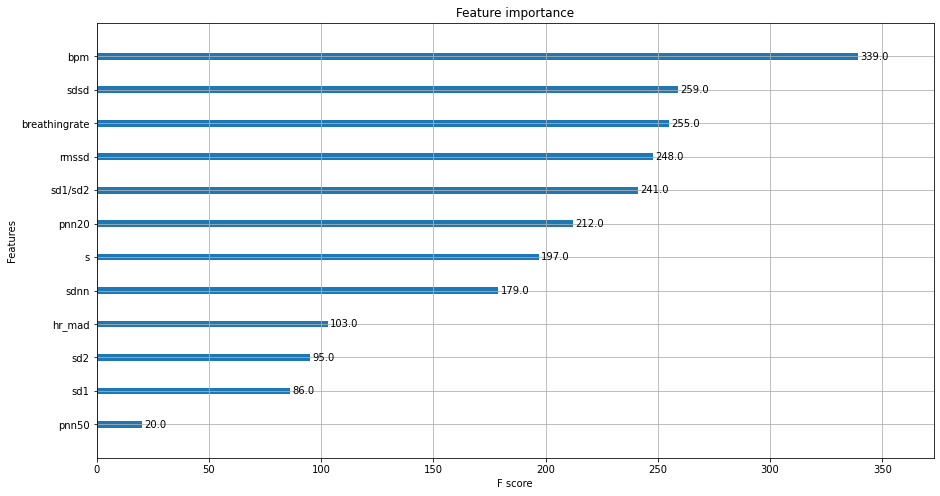

In [454]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(15, 8))
plot_importance(xgb, ax=ax)

plot_tree 시각화

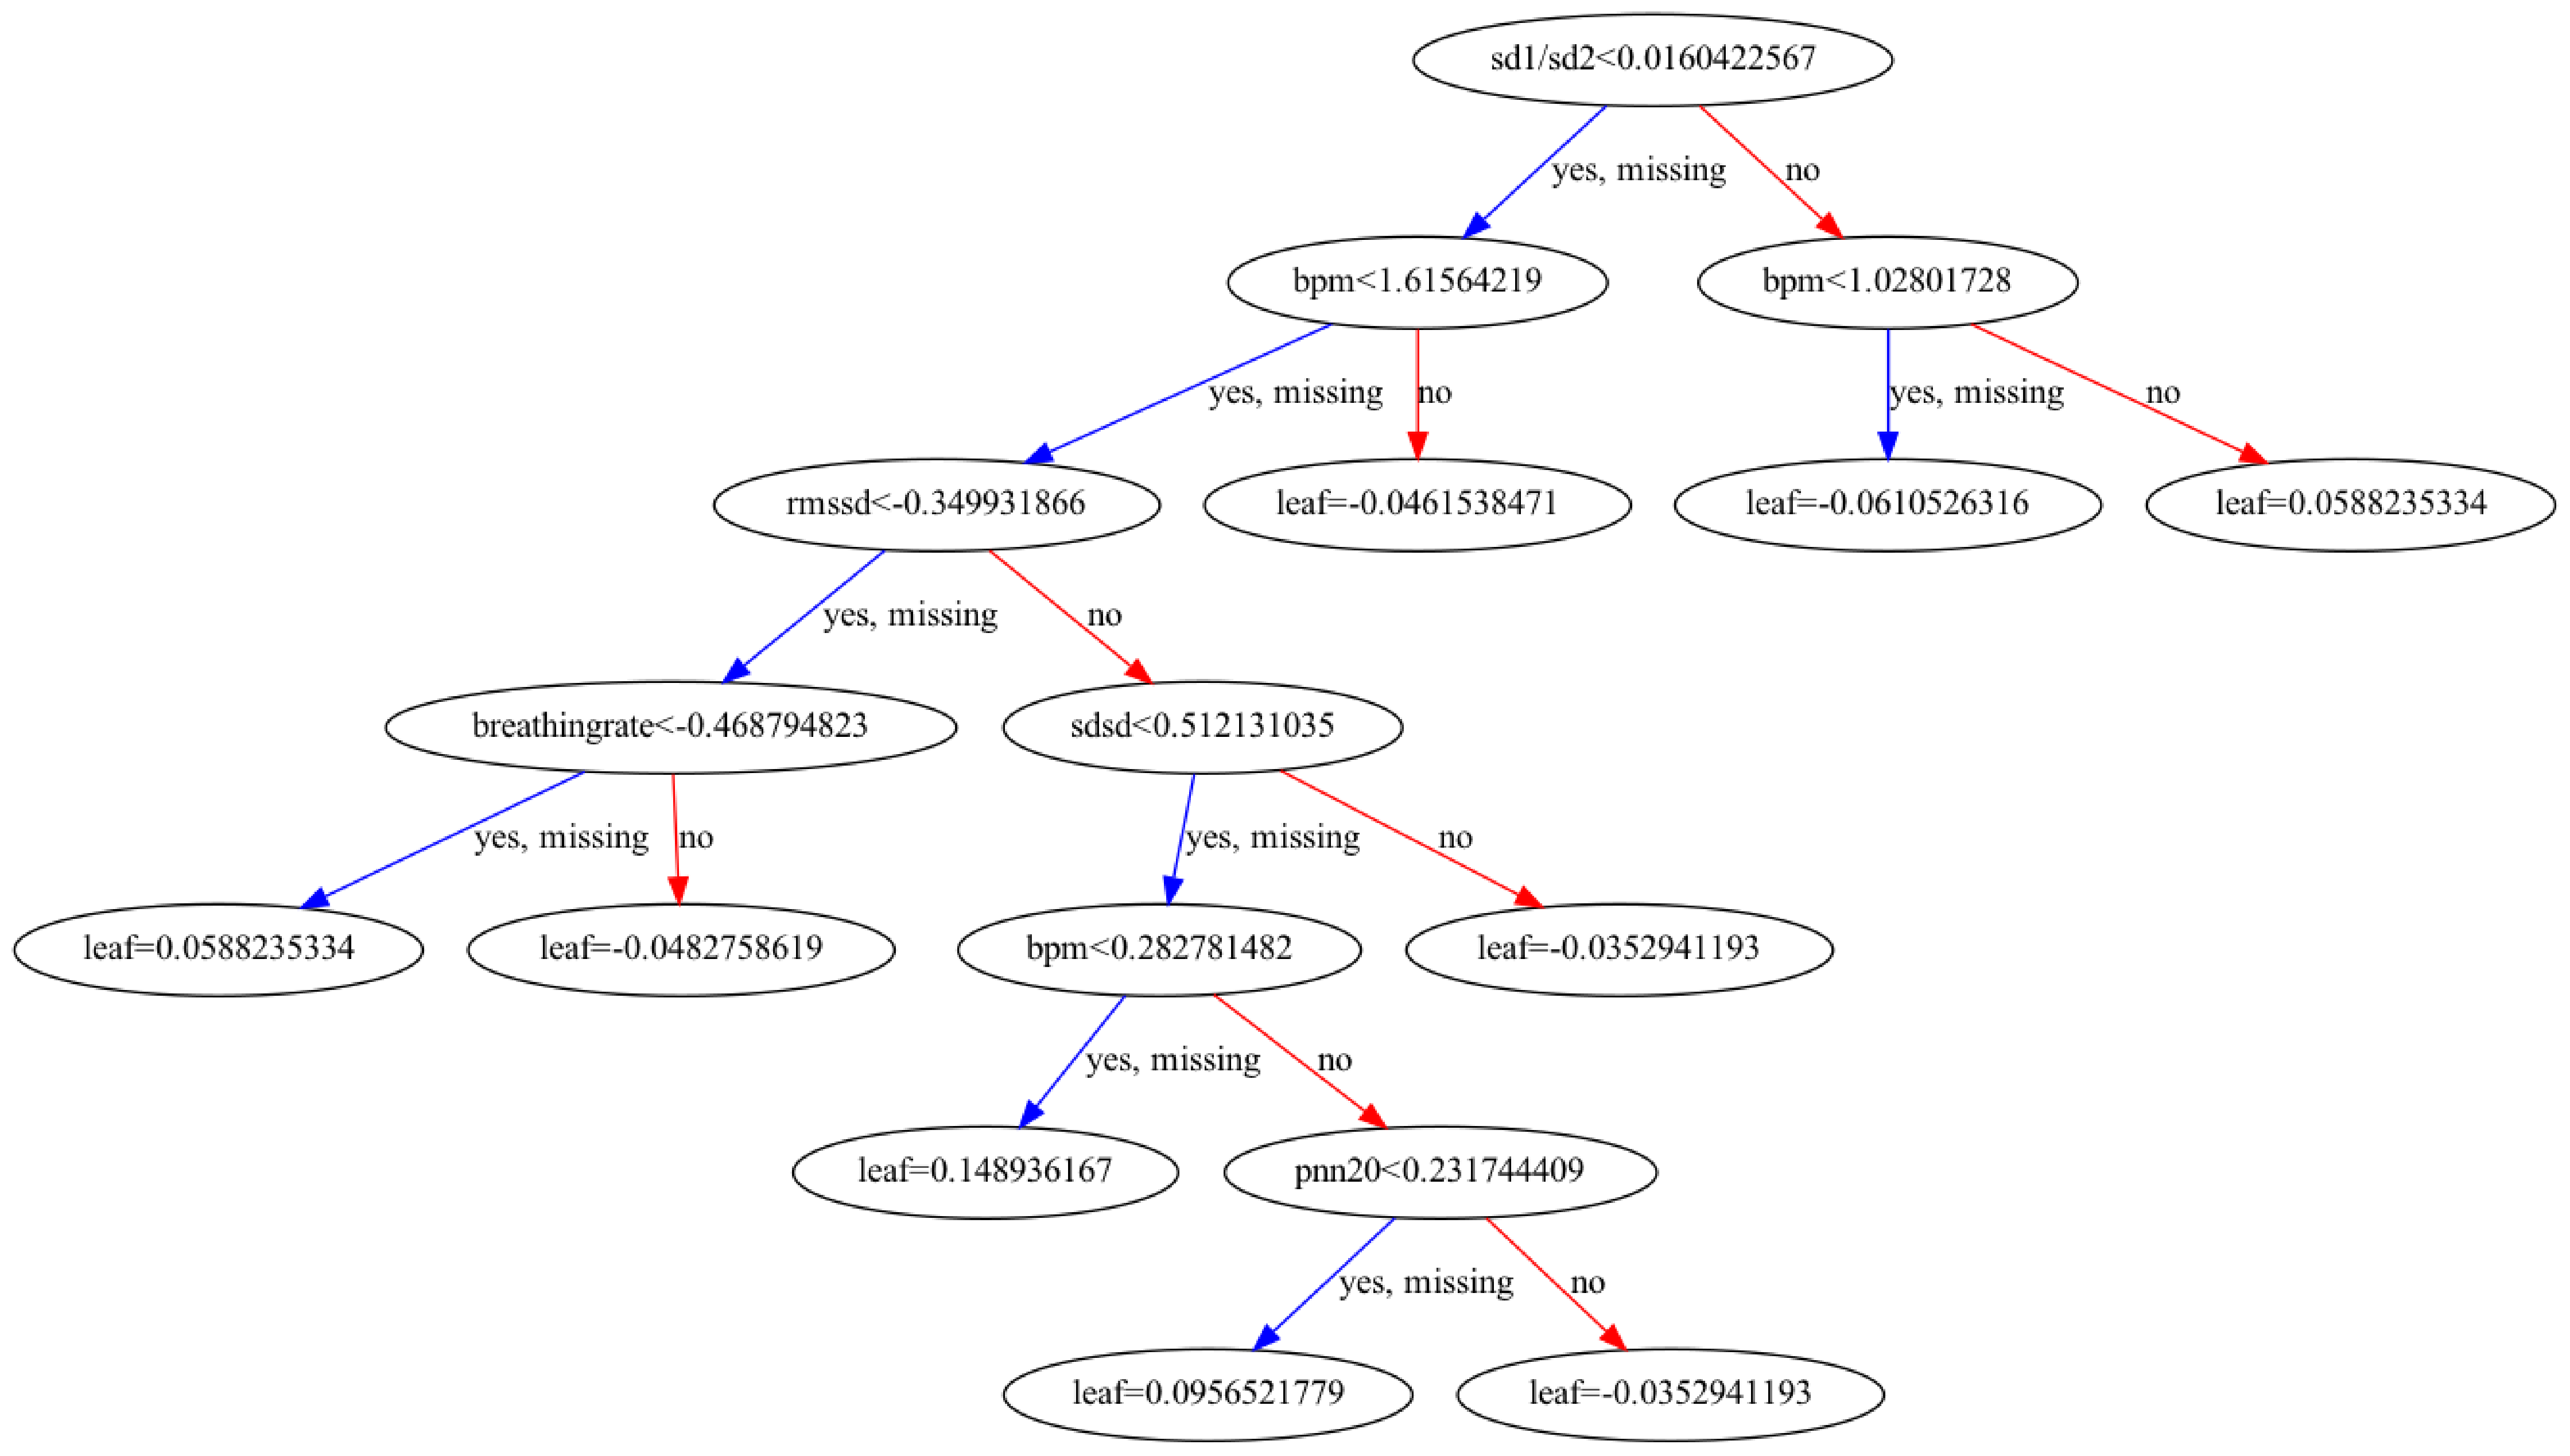

In [455]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 80, 80
plot_tree(xgb, num_trees=3)
plt.show()

### KNN Model  
hyperparameter에 따른 성능 평가

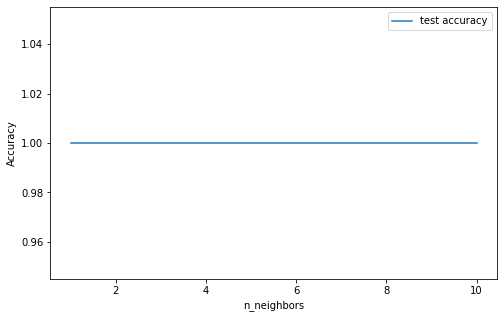

In [456]:
from sklearn.neighbors import KNeighborsClassifier

test_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, 
                            p=2, 
                            metric='minkowski')

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_pred = y_pred + start_subject_idx
    test_accuracy.append(accuracy_score(y_pred, y_test))

plt.figure(figsize=(8, 5))
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [457]:
test_accuracy[4]

1.0

In [ ]:
test